# **Crypto Market Cap Analysis**

#### **Configuration and Initialitation**

In [22]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
from dotenv import load_dotenv
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter
from datetime import datetime, timedelta
from sklearn.preprocessing import MinMaxScaler
from scipy.interpolate import make_interp_spline

load_dotenv()

# CSV Path
dataFrame = pd.read_csv(r'B:\GitHub Repository\Automated-Crypto-Market-Insights\analysis\cleaned-data\cleaned_data.csv')

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

#### *Data Overview*

In [23]:
dataFrame

,id,name,symbol,slug,cmc_rank,price,volume_24h,market_cap,percent_change_1h,percent_change_24h,percent_change_7d,last_updated,timestamp
0,1,Bitcoin,BTC,bitcoin,1,118812.727821,6.839326e+10,2.364250e+12,0.143085,0.019415,-0.490987,2025-07-29T13:07:00.000Z,2025-07-29 20:09:11.000000
1,1027,Ethereum,ETH,ethereum,2,3846.387411,3.732340e+10,4.643005e+11,0.263496,-0.583132,3.980048,2025-07-29T13:07:00.000Z,2025-07-29 20:09:11.000000
2,52,XRP,XRP,xrp,3,3.163179,6.866495e+09,1.873856e+11,0.681979,-1.832657,-10.052382,2025-07-29T13:06:00.000Z,2025-07-29 20:09:11.000000
3,825,Tether USDt,USDT,tether,4,1.000073,1.232903e+11,1.636695e+11,0.001521,0.005220,-0.027764,2025-07-29T13:06:00.000Z,2025-07-29 20:09:11.000000
4,1839,BNB,BNB,bnb,5,823.034935,3.040785e+09,1.146393e+11,-0.393254,-3.172967,7.509057,2025-07-29T13:06:00.000Z,2025-07-29 20:09:11.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
52695,7080,Gala,GALA,gala,96,0.015638,8.100658e+07,7.120105e+08,0.052952,2.299075,-8.796407,2025-08-05T12:02:00.000Z,2025-08-05T19:04:06.100813
52696,6210,The Sandbox,SAND,the-sandbox,97,0.273670,4.561855e+07,7.042330e+08,0.059894,2.859992,-8.815140,2025-08-05T12:01:00.000Z,2025-08-05T19:04:06.100822
52697,7326,DeXe,DEXE,dexe,98,8.205102,1.632262e+07,6.870413e+08,4.554051,10.430664,12.329482,2025-08-05T12:01:00.000Z,2025-08-05T19:04:06.100832
52698,28177,Pyth Network,PYTH,pyth-network,99,0.117073,2.636468e+07,6.731690e+08,0.328602,1.472813,-9.517627,2025-08-05T12:02:00.000Z,2025-08-05T19:04:06.100841


## **Analysis**

#### 1. *Top 5 Gainers and Losers*

✅ Using the most recent data per coin for analysis.

--- DAILY PERCENTAGE PRICE CHANGE ANALYSIS ---

📈 Top 5 Gainers (24h Price Change):
  Mantle (MNT): 20.60% 📈
  Litecoin (LTC): 11.44% 📈
  Pump.fun (PUMP): 10.90% 📈
  DeXe (DEXE): 10.43% 📈
  POL (prev. MATIC) (POL): 10.10% 📈

📉 Top 5 Losers (24h Price Change):
  Toncoin (TON): -6.53% 📉
  MemeCore (M): -4.36% 📉
  Aerodrome Finance (AERO): -4.17% 📉
  Monero (XMR): -3.72% 📉
  Ethena (ENA): -3.21% 📉


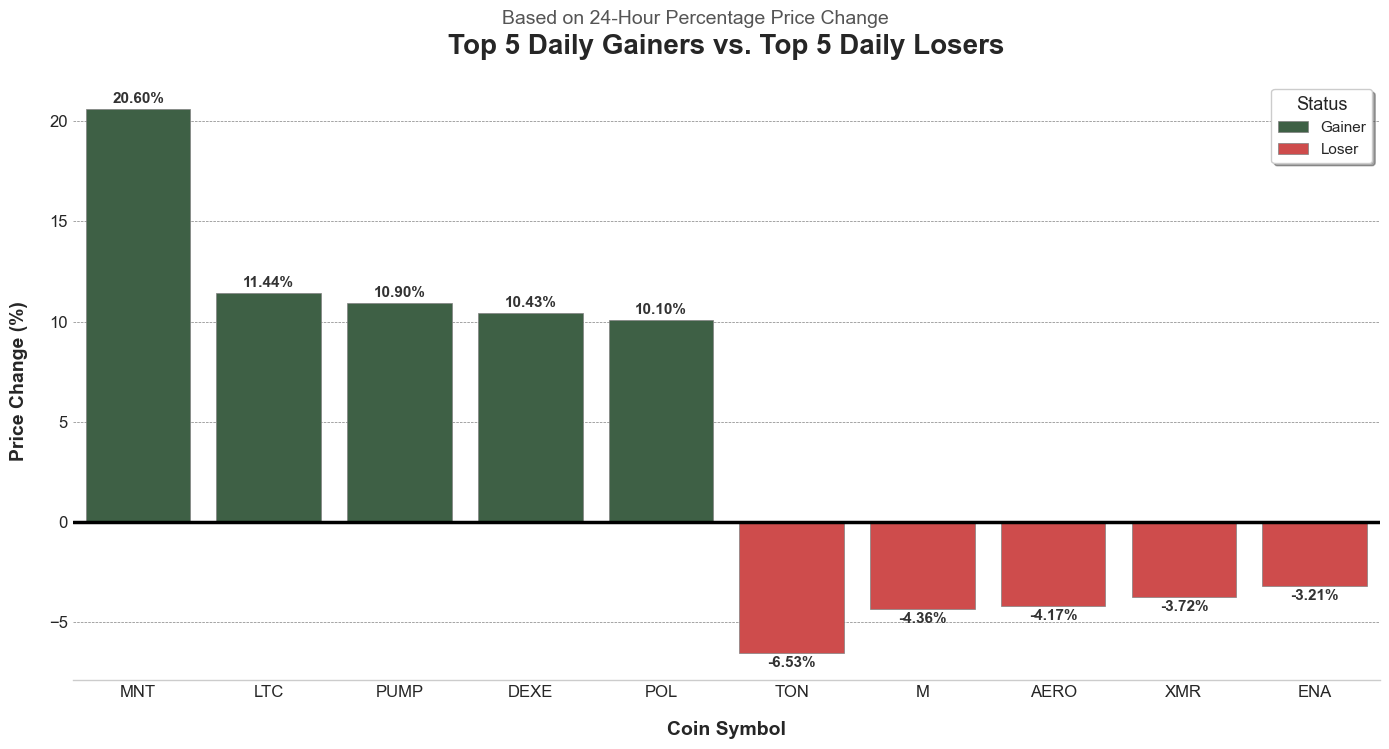

In [24]:
# Extracting the most recent data entry per coin
# Assumes 'last_updated' column exists and contains valid timestamps
if 'last_updated' in dataFrame.columns:
    latest_data = dataFrame.loc[dataFrame.groupby('id')['last_updated'].idxmax()].copy()
    print("✅ Using the most recent data per coin for analysis.")
else:
    latest_data = dataFrame.copy()
    print("⚠️ Column 'last_updated' not found. Using the full DataFrame instead.")

# --- DAILY PERCENTAGE PRICE CHANGE ANALYSIS ---
print("\n--- DAILY PERCENTAGE PRICE CHANGE ANALYSIS ---")

if 'percent_change_24h' in latest_data.columns:
    # Remove rows with NaN values in percent_change_24h
    filtered_data = latest_data.dropna(subset=['percent_change_24h']).copy()
    
    # Top 5 Gainers and Losers
    top_gainers = filtered_data.sort_values(by='percent_change_24h', ascending=False).head(5).copy()
    top_gainers['status'] = 'Gainer'
    top_losers = filtered_data.sort_values(by='percent_change_24h', ascending=True).head(5).copy()
    top_losers['status'] = 'Loser'
    
    print("\n📈 Top 5 Gainers (24h Price Change):")
    for index, row in top_gainers.iterrows():
        print(f"  {row['name']} ({row['symbol']}): {row['percent_change_24h']:.2f}% 📈")
    
    print("\n📉 Top 5 Losers (24h Price Change):")
    for index, row in top_losers.iterrows():
        print(f"  {row['name']} ({row['symbol']}): {row['percent_change_24h']:.2f}% 📉")
    
    # --- Enhanced Barchart Visualization ---
    combined_data = pd.concat([top_gainers, top_losers])
    
    # Custom order: gainers on the left, losers on the right
    sorted_symbols = list(top_gainers['symbol']) + list(top_losers['symbol'])
    combined_data['symbol'] = pd.Categorical(
        combined_data['symbol'], 
        categories=sorted_symbols, 
        ordered=True
    )
    
    plt.figure(figsize=(14, 8))
    
    # Custom color palette
    custom_palette = {'Gainer': '#386641', 'Loser': '#E43636'}
    
    ax = sns.barplot(
        x='symbol', 
        y='percent_change_24h', 
        hue='status', 
        data=combined_data, 
        palette=custom_palette, 
        dodge=False,
        order=sorted_symbols,
        edgecolor='gray',
        linewidth=0.5
    )
    
    # Add horizontal line at y=0
    ax.axhline(y=0, color='black', linewidth=2.5, zorder=1)
    
    # Remove top, right, and left spines
    for spine in ['top', 'right', 'left']:
        ax.spines[spine].set_visible(False)
    
    # Horizontal grid only
    ax.yaxis.grid(True, linestyle='--', linewidth=0.5, color='gray', zorder=0)
    ax.xaxis.grid(False)

    # Add percentage labels to each bar
    for p in ax.patches:
        height = p.get_height()
        if abs(height) > 0.01:
            ax.text(p.get_x() + p.get_width() / 2., 
                    height + np.sign(height) * 0.5,
                    f'{height:.2f}%', 
                    ha='center', 
                    va='center',
                    fontsize=11, 
                    fontweight='bold',
                    color='#333333')
    
    # Chart labels and title
    plt.title('Top 5 Daily Gainers vs. Top 5 Daily Losers', 
              fontsize=20, 
              fontweight='bold', 
              pad=20)
    plt.suptitle('Based on 24-Hour Percentage Price Change', 
                 fontsize=14, 
                 y=0.93,
                 color='#555555')
    plt.xlabel('Coin Symbol', fontsize=14, labelpad=15, fontweight='bold')
    plt.ylabel('Price Change (%)', fontsize=14, labelpad=15, fontweight='bold')
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    
    # Legend customization
    ax.legend(title='Status', 
              loc='upper right', 
              frameon=True, 
              shadow=True, 
              title_fontsize='13',
              fontsize='11')
    
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

else:
    print("❌ Column 'percent_change_24h' not found in your DataFrame.")


#### 2. *Bitcoin and Etherium Comparation (Big Bro and the Lil Bro) by Trading Volume, Price Actions, and Volatility*

SUCCESS: Data loaded from 'cleaned_data.csv'.


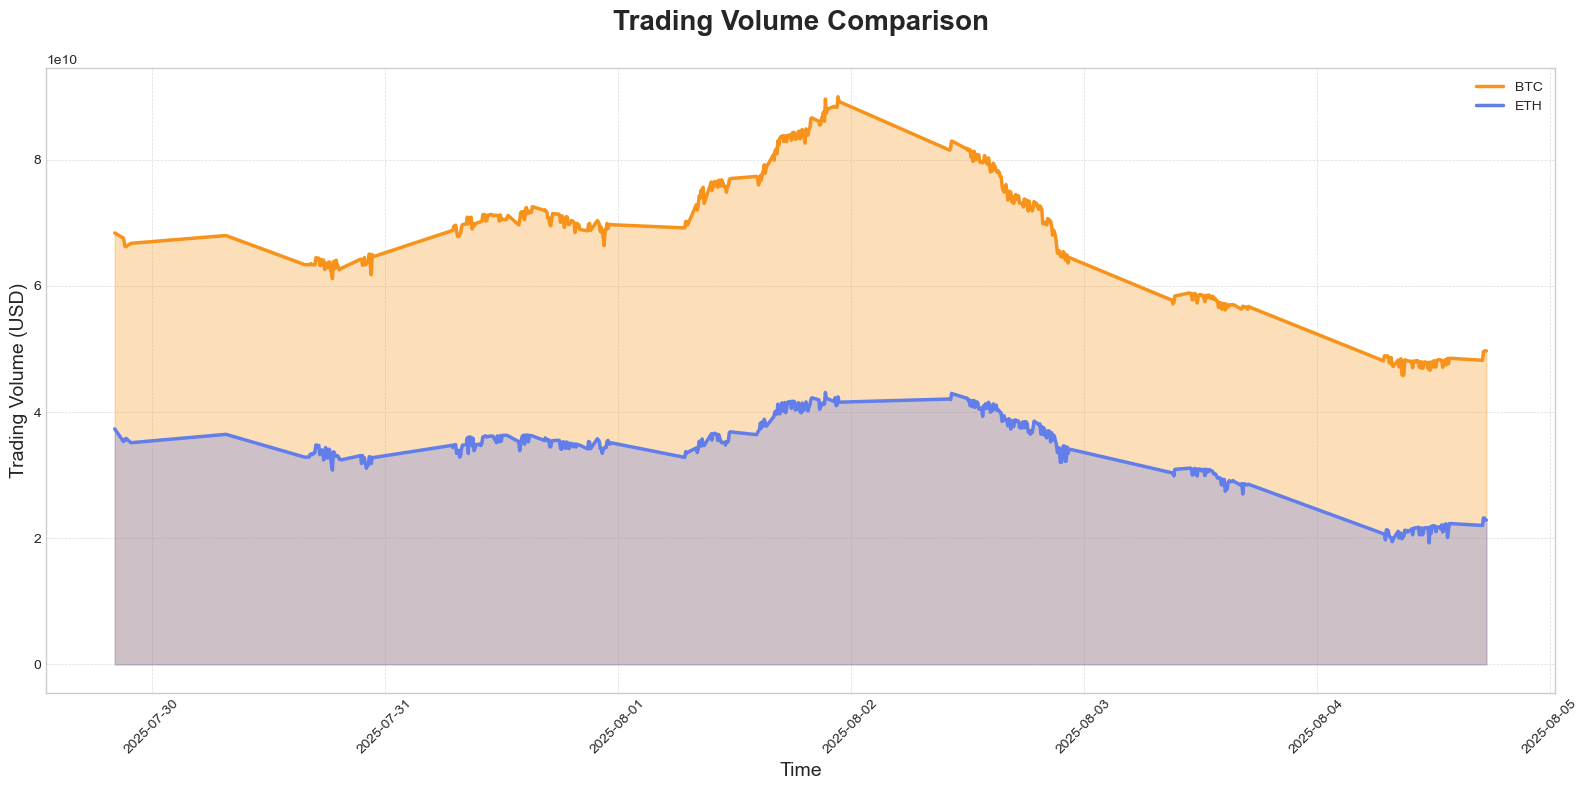

C:\Users\Asus\AppData\Local\Temp\ipykernel_8240\3229269285.py:80: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])


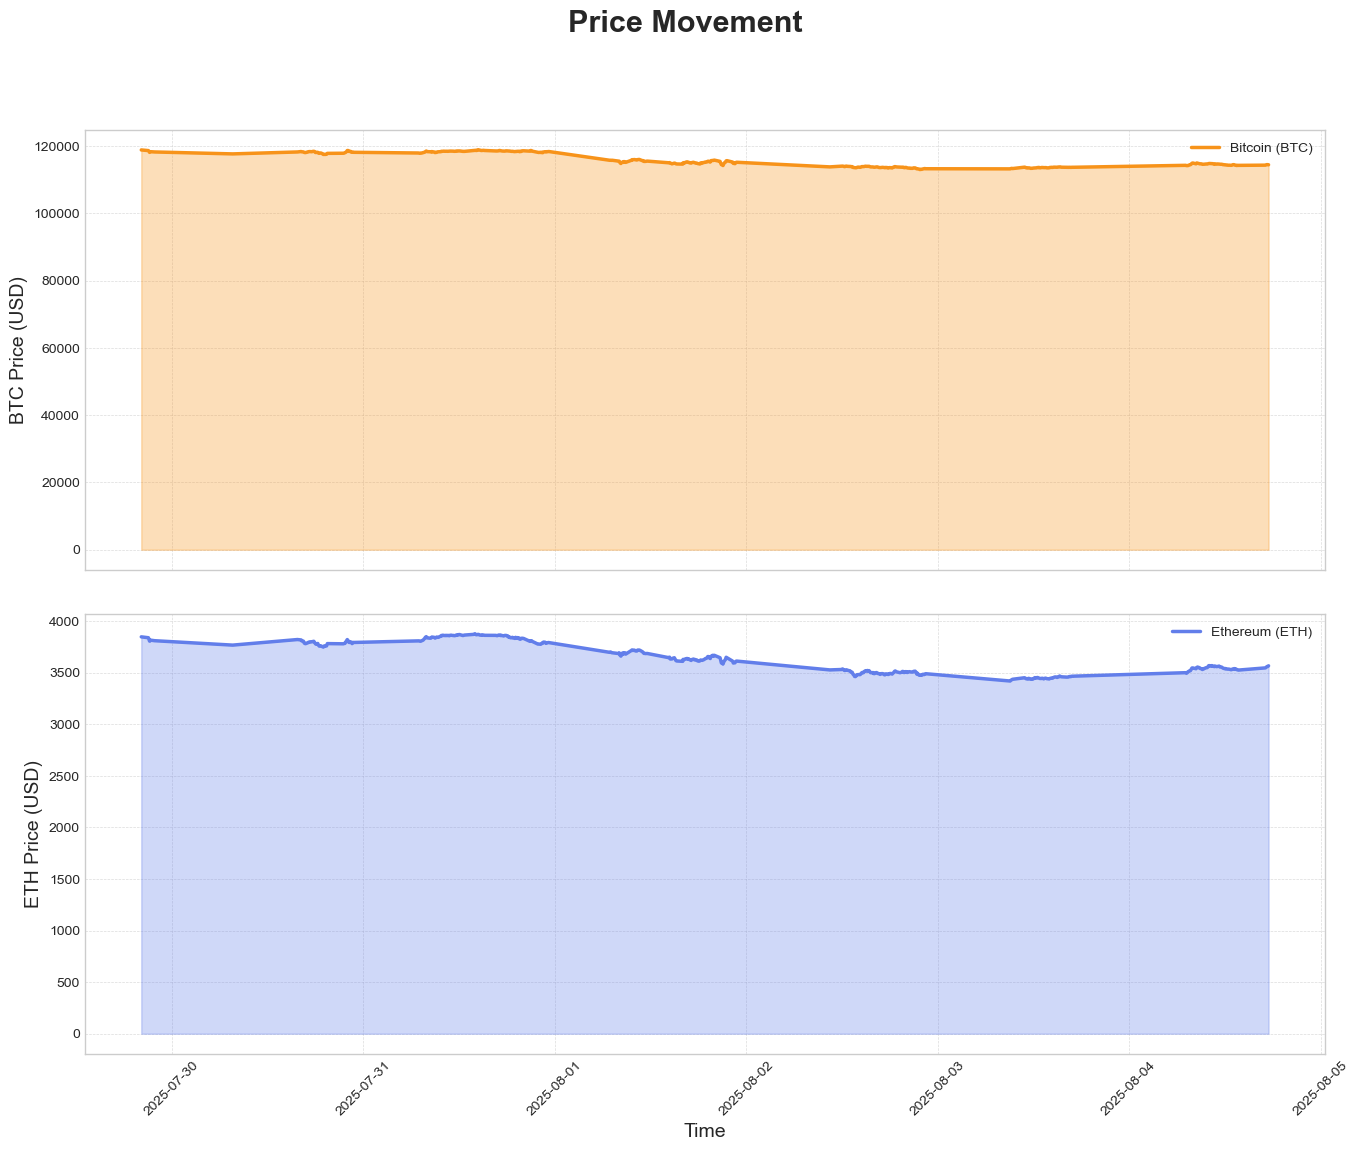

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load CSV or use simulated data
try:
    dataFrame = pd.read_csv(r'B:\GitHub Repository\Automated-Crypto-Market-Insights\analysis\cleaned-data\cleaned_data.csv')
    print("SUCCESS: Data loaded from 'cleaned_data.csv'.")
except FileNotFoundError:
    print("WARNING: File 'cleaned_data.csv' not found. Using simulated data instead.")
    timestamps = pd.date_range(end=pd.Timestamp.now(), periods=10*24, freq='h')
    np.random.seed(42)
    
    btc_price = np.cumprod(1 + np.random.normal(0, 0.005, 10*24)) * 60000
    btc_volume = np.random.randint(1e9, 5e9, 10*24)
    btc_data = pd.DataFrame({'timestamp': timestamps, 'symbol': 'BTC', 'price': btc_price, 'volume_24h': btc_volume})
    
    eth_price = np.cumprod(1 + np.random.normal(0, 0.007, 10*24)) * 4000
    eth_volume = np.random.randint(5e8, 2e9, 10*24)
    eth_data = pd.DataFrame({'timestamp': timestamps, 'symbol': 'ETH', 'price': eth_price, 'volume_24h': eth_volume})
    
    dataFrame = pd.concat([btc_data, eth_data], ignore_index=True)
    dataFrame.sort_values(by='timestamp', inplace=True)

# Format and filter data
sns.set_style("whitegrid")
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['figure.dpi'] = 100

btc_eth_data = dataFrame[dataFrame['symbol'].isin(['BTC', 'ETH'])].copy()
btc_eth_data['timestamp'] = pd.to_datetime(btc_eth_data['timestamp'], errors='coerce')
btc_eth_data.dropna(subset=['timestamp'], inplace=True)
btc_eth_data.set_index('timestamp', inplace=True)
btc_eth_data['volume_24h'] = pd.to_numeric(btc_eth_data['volume_24h'], errors='coerce')
btc_eth_data['price'] = pd.to_numeric(btc_eth_data['price'], errors='coerce')

# Colors
btc_color = '#F7931A'
eth_color = '#627EEA'

# --- Trading Volume Visualization ---
plt.figure(figsize=(16, 8))
for symbol, color in zip(['BTC', 'ETH'], [btc_color, eth_color]):
    symbol_data = btc_eth_data[btc_eth_data['symbol'] == symbol]
    plt.plot(symbol_data.index, symbol_data['volume_24h'], label=f'{symbol}', linewidth=2.5, color=color)
    plt.fill_between(symbol_data.index, symbol_data['volume_24h'], alpha=0.3, color=color)

plt.title('Trading Volume Comparison\n', fontsize=20, fontweight='bold')
plt.xlabel('Time', fontsize=14)
plt.ylabel('Trading Volume (USD)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

# --- BTC and ETH Price Visualization (separate panels) ---
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 12), sharex=True, gridspec_kw={'hspace': 0.1})
fig.suptitle('Price Movement', fontsize=22, fontweight='bold')

btc_data = btc_eth_data[btc_eth_data['symbol'] == 'BTC']
eth_data = btc_eth_data[btc_eth_data['symbol'] == 'ETH']

ax1.plot(btc_data.index, btc_data['price'], label='Bitcoin (BTC)', color=btc_color, linewidth=2.5)
ax1.fill_between(btc_data.index, btc_data['price'], alpha=0.3, color=btc_color)
ax1.set_ylabel('BTC Price (USD)', fontsize=14)
ax1.legend()
ax1.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

ax2.plot(eth_data.index, eth_data['price'], label='Ethereum (ETH)', color=eth_color, linewidth=2.5)
ax2.fill_between(eth_data.index, eth_data['price'], alpha=0.3, color=eth_color)
ax2.set_ylabel('ETH Price (USD)', fontsize=14)
ax2.set_xlabel('Time', fontsize=14)
ax2.legend()
ax2.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

plt.xticks(rotation=45)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


#### 4. *Do coins with large market capitalization (solid) always have relatively stable prices?*

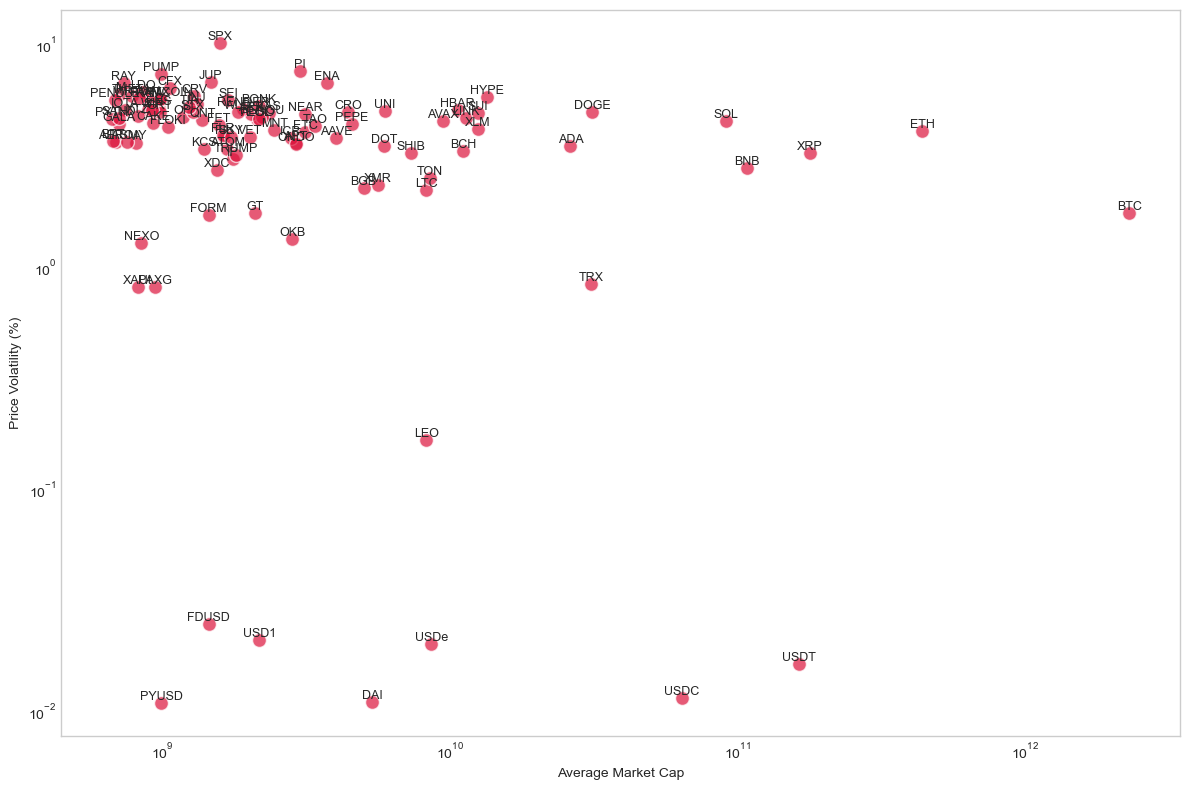

In [26]:
grouped_df = dataFrame.groupby('symbol').agg({
    'price': ['mean', 'std'],
    'market_cap': 'mean',
    'name': 'first'
}).reset_index()

# Rename kolom
grouped_df.columns = ['symbol', 'mean_price', 'std_price', 'avg_market_cap', 'coin_name']

# Hitung volatilitas dalam persen
grouped_df['volatility_pct'] = (grouped_df['std_price'] / grouped_df['mean_price']) * 100

# Plot dengan matplotlib tanpa garis/grid
plt.figure(figsize=(12, 8))
plt.scatter(
    grouped_df['avg_market_cap'],
    grouped_df['volatility_pct'],
    s=100,
    alpha=0.7,
    c='crimson',
    edgecolors='w'
)

# Tambahkan label coin (symbol)
for i, row in grouped_df.iterrows():
    plt.text(row['avg_market_cap'], row['volatility_pct'], row['symbol'],
             fontsize=9, ha='center', va='bottom')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Average Market Cap')
plt.ylabel('Price Volatility (%)')

# Nonaktifkan grid
plt.grid(False)

plt.tight_layout()
plt.show()


#### 5. *Visualizes the Top 10 Coin with the highest Volatility using Percentage Standard Deviation (Relative Volatility)*


--- TOP 10 MOST VOLATILE COINS ANALYSIS ---


C:\Users\Asus\AppData\Local\Temp\ipykernel_8240\977483097.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


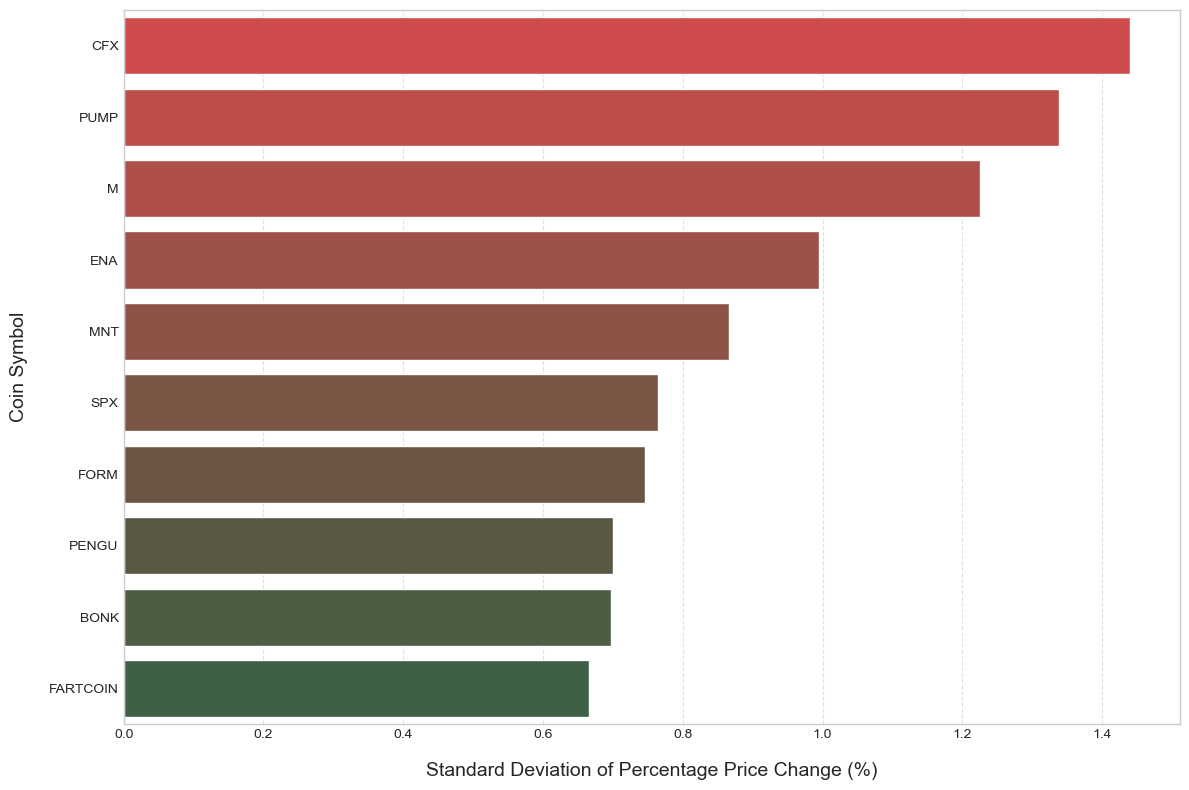

In [27]:
print("\n--- TOP 10 MOST VOLATILE COINS ANALYSIS ---")

# Ensure 'last_updated' column is datetime format and 'price' is not NaN
dataFrame['last_updated'] = pd.to_datetime(dataFrame['last_updated'], errors='coerce')
dataFrame.dropna(subset=['last_updated', 'price'], inplace=True)

# --- FIX: Calculate standard deviation of percentage price change ---
# Sort data by timestamp for correct change calculation
dataFrame_sorted = dataFrame.sort_values(by=['symbol', 'last_updated'])

# Calculate the percentage change in price for each coin
# We will use pct_change() on price, then take its standard deviation
dataFrame_sorted['daily_percent_change'] = dataFrame_sorted.groupby('symbol')['price'].pct_change() * 100

# Calculate the standard deviation of percentage price change
# This measures how much the coin's price fluctuates relatively
volatility_std = dataFrame_sorted.groupby('symbol')['daily_percent_change'].std().reset_index()
volatility_std.rename(columns={'daily_percent_change': 'volatility_std'}, inplace=True)

# Remove rows with NaN in volatility_std (coins with only 1 data point or no change)
volatility_std.dropna(subset=['volatility_std'], inplace=True)

# Merge with coin names for better labeling in the chart
# Get the latest name for each symbol (important if historical data exists)
latest_names = dataFrame.drop_duplicates(subset=['symbol'], keep='last')[['symbol', 'name']]
volatility_std = pd.merge(volatility_std, latest_names, on='symbol', how='left')

# Sort by volatility (standard deviation) and take the top 10
top_volatile = volatility_std.sort_values(by='volatility_std', ascending=False).head(10).copy()

# Visualize the top 10 most volatile coins with a bar chart
# Adjust figure size to accommodate 10 bars
plt.figure(figsize=(12, 8)) 

# Create a custom color palette from red to green
# Since it's sorted descending (highest volatility at the top), the first bar will be red, the last green
# Red color (#E43636) for high volatility, green (#386641) for low volatility
custom_palette = sns.blend_palette(['#E43636', '#386641'], n_colors=len(top_volatile))

sns.barplot(
    data=top_volatile,
    x='volatility_std',
    y='symbol', # Using 'symbol' for the Y-axis label
    palette=custom_palette, 
    orient='h'
)
plt.xlabel('Standard Deviation of Percentage Price Change (%)', fontsize=14, labelpad=15)
plt.ylabel('Coin Symbol', fontsize=14, labelpad=15) # Change Y-axis label
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


#### 6. *Visualizes Top 10 Trading Volumes to check wich coin is the most liquid? and verify the trend*


--- TOP 10 COINS BY 24-HOUR TRADING VOLUME ANALYSIS ---

High trading volume is often an indicator that a coin is 'hot' or widely discussed in the market. It signifies high interest and trading activity.

Here are the top 10 coins based on 24-hour trading volume:
  - Tether USDt (USDT): Volume $100,048,690,443.33162
  - Bitcoin (BTC): Volume $56,228,715,938.24329
  - Ethereum (ETH): Volume $33,693,388,889.31204
  - Dai (DAI): Volume $19,460,764,788.43872
  - USDC (USDC): Volume $12,001,818,519.771128
  - First Digital USD (FDUSD): Volume $6,488,869,892.434657
  - XRP (XRP): Volume $5,729,823,842.576582
  - Solana (SOL): Volume $5,153,072,050.333462
  - Litecoin (LTC): Volume $1,965,705,704.8993728
  - BNB (BNB): Volume $1,944,183,058.7561035


C:\Users\Asus\AppData\Local\Temp\ipykernel_8240\288119574.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


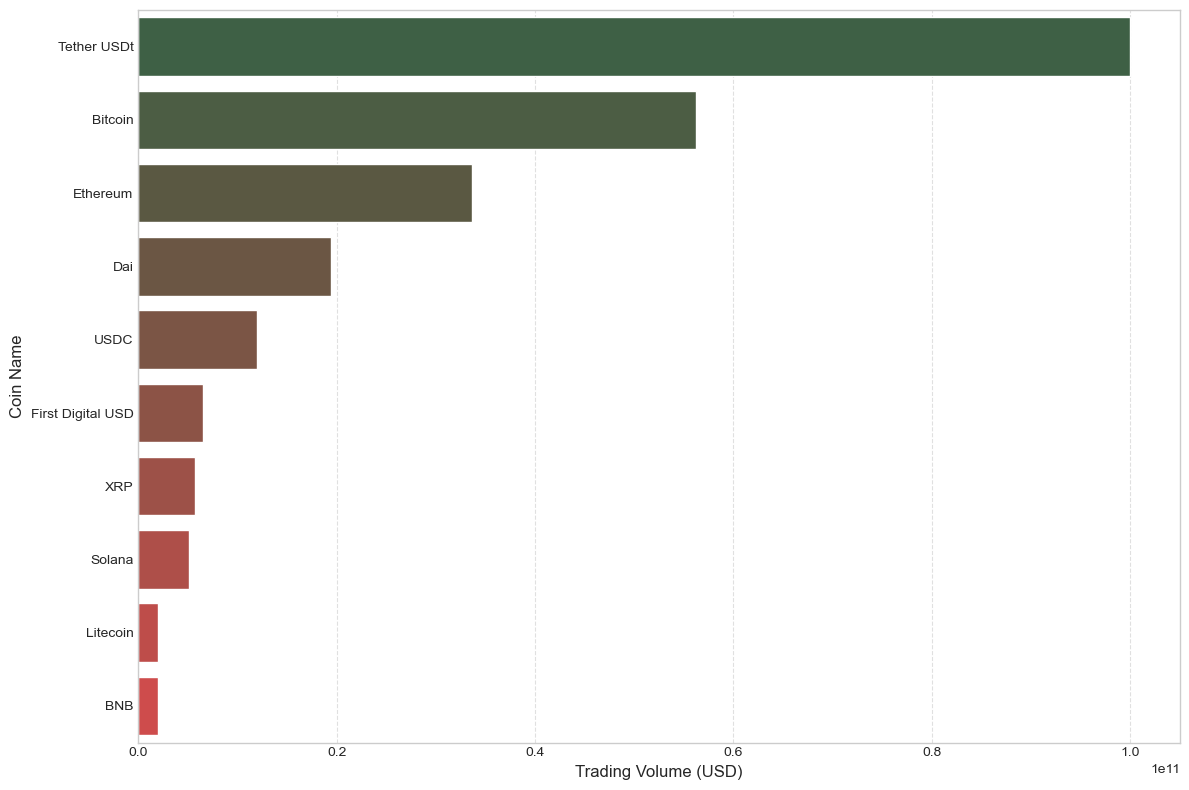

In [28]:
print("\n--- TOP 10 COINS BY 24-HOUR TRADING VOLUME ANALYSIS ---")

latest_data = dataFrame.loc[dataFrame.groupby('id')['timestamp'].idxmax()].copy()

# Check if 'volume_24h' column is available
if 'volume_24h' not in latest_data.columns:
    print("The 'volume_24h' column was not found. Cannot perform volume analysis.")
    # Stop execution if crucial column is missing
else:
    # Sort by volume_24h and take the top 10
    top_volume_coins = latest_data.sort_values(by='volume_24h', ascending=False).head(10).copy()

    print("\nHigh trading volume is often an indicator that a coin is 'hot' or widely discussed in the market. It signifies high interest and trading activity.")
    print("\nHere are the top 10 coins based on 24-hour trading volume:")
    for index, row in top_volume_coins.iterrows():
        print(f"  - {row['name']} ({row['symbol']}): Volume ${row['volume_24h']:,}")

    # Visualize the top 10 coins by volume with a bar chart
    plt.figure(figsize=(12, 8))

    # Create a custom color palette from green to red
    # Since the data is sorted in descending order (highest volume at the top),
    # the top bar (highest volume) will be green, and the bottom bar (lowest volume among top 10) will be red.
    custom_palette = sns.blend_palette(['#386641', '#E43636'], n_colors=len(top_volume_coins))

    sns.barplot(
        data=top_volume_coins,
        x='volume_24h',
        y='name',
        palette=custom_palette, # Use the custom color palette
        orient='h'
    )
    plt.xlabel('Trading Volume (USD)', fontsize=12)
    plt.ylabel('Coin Name', fontsize=12)
    plt.grid(axis='x', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()



--- TOP 10 COINS BY HIGHEST MARKET CAPITALIZATION ANALYSIS ---

Here are the top 10 coins with the highest market capitalization:


C:\Users\Asus\AppData\Local\Temp\ipykernel_8240\2711964887.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


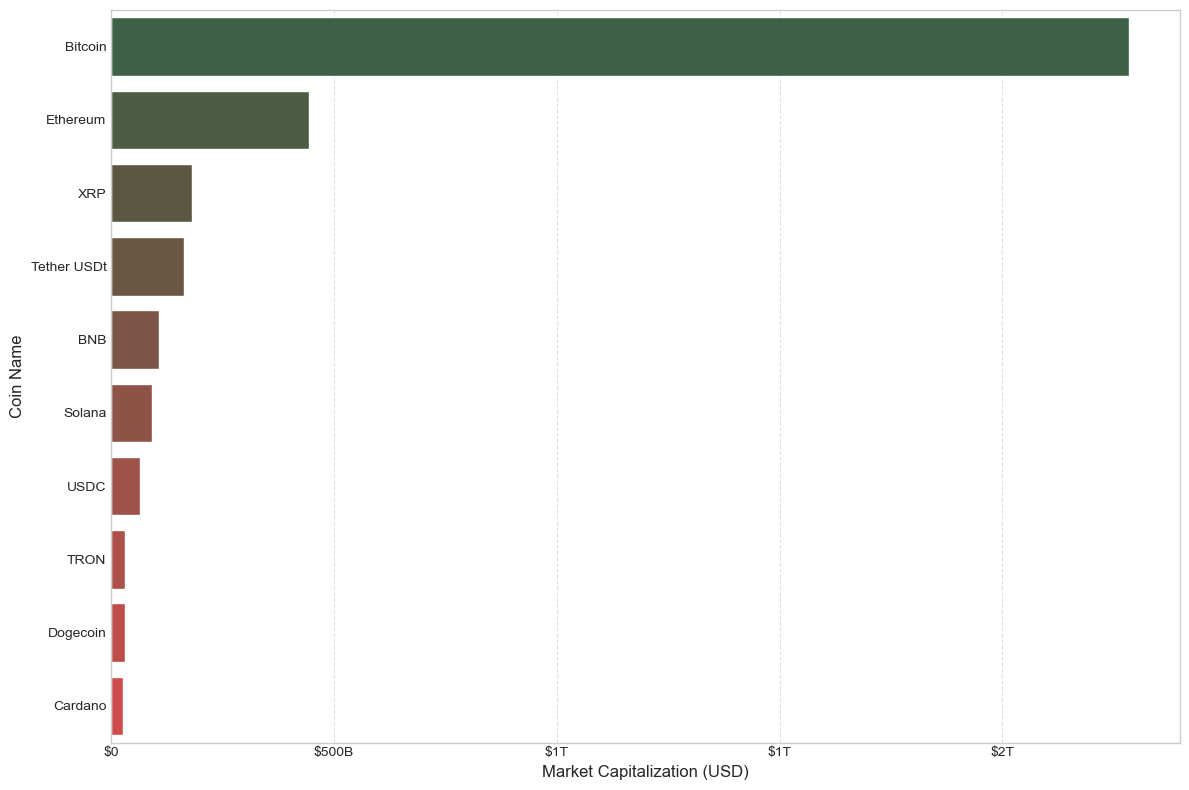

In [29]:
print("\n--- TOP 10 COINS BY HIGHEST MARKET CAPITALIZATION ANALYSIS ---")

# Get the latest data per coin
if 'timestamp' in dataFrame.columns:
    latest_data = dataFrame.loc[dataFrame.groupby('id')['timestamp'].idxmax()].copy()
else:
    latest_data = dataFrame.copy()

# Check if 'market_cap' column is available
if 'market_cap' in latest_data.columns:
    print("\nHere are the top 10 coins with the highest market capitalization:")

    # Sort by market_cap in descending order (highest) and take the top 10
    highest_market_cap_coins = latest_data.sort_values(by='market_cap', ascending=False).head(10).copy()

    # Visualize the bar chart
    plt.figure(figsize=(12, 8))
    ax = sns.barplot(
        data=highest_market_cap_coins,
        x='market_cap',
        y='name',
        # Create a custom color palette from green to red
        # Since data is sorted descending, the top bar (highest market cap) will be green,
        # and the bottom bar (lowest market cap among top 10) will be red.
        palette=sns.blend_palette(['#386641', '#E43636'], n_colors=len(highest_market_cap_coins)),
        orient='h'
    )

    # Format x-axis labels to millions, billions, or trillions
    def format_market_cap(x, pos):
        if x >= 1e12:
            return f'${int(x/1e12)}T'
        elif x >= 1e9:
            return f'${int(x/1e9)}B'
        elif x >= 1e6:
            return f'${int(x/1e6)}M'
        else:
            return f'${int(x)}'

    ax.xaxis.set_major_formatter(FuncFormatter(format_market_cap))

    plt.xlabel('Market Capitalization (USD)', fontsize=12)
    plt.ylabel('Coin Name', fontsize=12)
    plt.grid(axis='x', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

else:
    print("The 'market_cap' column was not found in your DataFrame. This analysis cannot be performed.")



--- ANALYSIS OF 10 COINS WITH THE LOWEST MARKET CAPITALIZATION ---

Here are the 10 coins with the lowest market capitalization:


C:\Users\Asus\AppData\Local\Temp\ipykernel_8240\3905925295.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


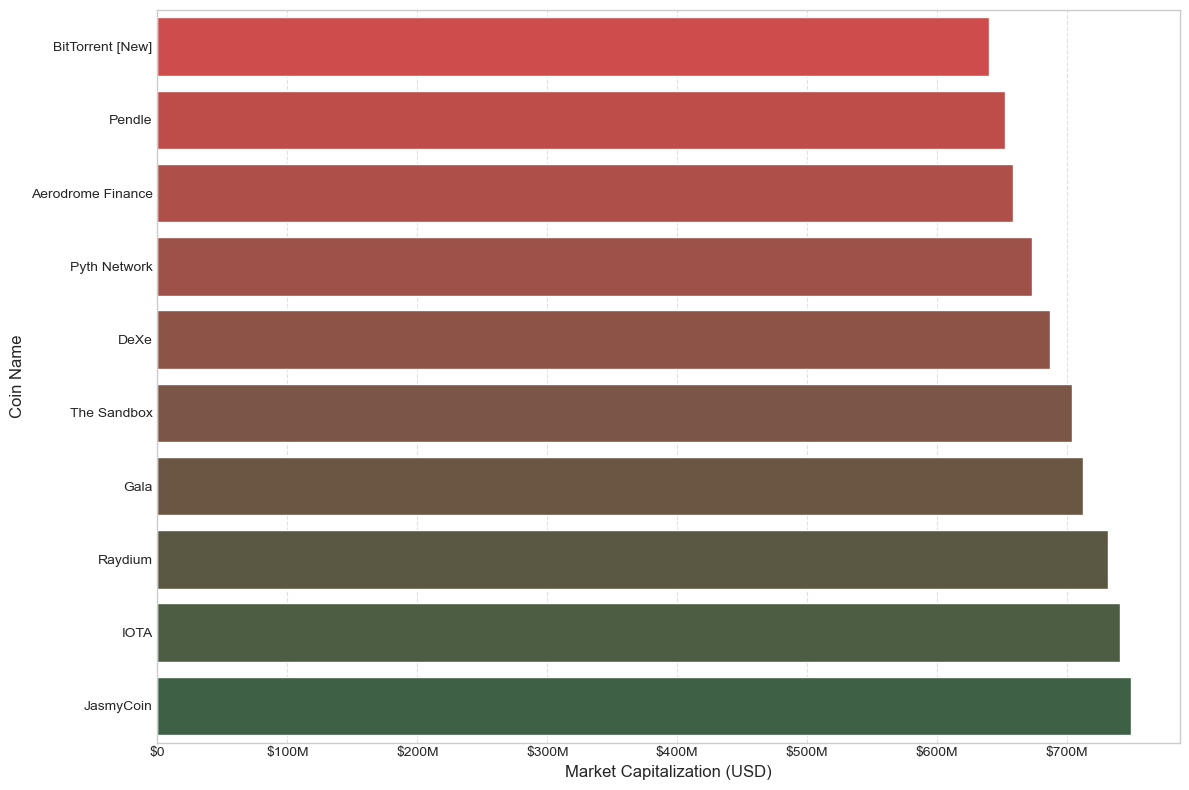

In [30]:
print("\n--- ANALYSIS OF 10 COINS WITH THE LOWEST MARKET CAPITALIZATION ---")

# Get the latest entry for each coin
if 'timestamp' in dataFrame.columns:
    latest_data = dataFrame.loc[dataFrame.groupby('id')['timestamp'].idxmax()].copy()
else:
    latest_data = dataFrame.copy()

# Ensure 'market_cap' column exists
if 'market_cap' in latest_data.columns:
    print("\nHere are the 10 coins with the lowest market capitalization:")

    # Sort by market_cap in ASCENDING order (lowest on top) and select the top 10
    lowest_market_cap_coins = latest_data.sort_values(by='market_cap', ascending=True).head(10).copy()

    # Bar chart visualization
    plt.figure(figsize=(12, 8))
    ax = sns.barplot(
        data=lowest_market_cap_coins,
        x='market_cap',
        y='name',
        # Custom color palette from red to green
        # Since the data is sorted ASCENDING, the top bar (lowest) will be red,
        # and the bottom bar (highest among the lowest 10) will be green.
        palette=sns.blend_palette(['#E43636', '#386641'], n_colors=len(lowest_market_cap_coins)),
        orient='h'
    )

    # Format x-axis labels (Thousands, Millions, Billions)
    def format_market_cap(x, pos):
        if x >= 1e9:
            return f'${int(x/1e9)}B'
        elif x >= 1e6:
            return f'${int(x/1e6)}M'
        elif x >= 1e3:
            return f'${int(x/1e3)}K'
        else:
            return f'${int(x)}'

    ax.xaxis.set_major_formatter(FuncFormatter(format_market_cap))

    plt.xlabel('Market Capitalization (USD)', fontsize=12)
    plt.ylabel('Coin Name', fontsize=12)
    plt.grid(axis='x', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

else:
    print("The 'market_cap' column was not found in your DataFrame. This analysis cannot proceed.")


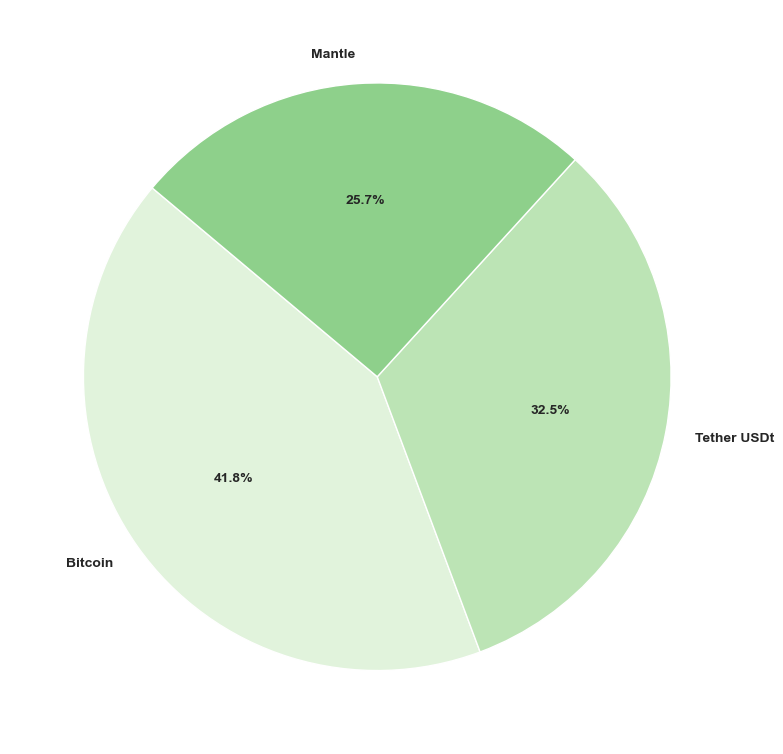

In [31]:
latest_data = dataFrame.sort_values('timestamp').groupby('name', as_index=False).last()

# Hitung rata-rata metrik untuk setiap coin
average_metrics = latest_data.groupby("name").agg({
    "percent_change_1h": "mean",
    "percent_change_24h": "mean",
    "percent_change_7d": "mean",
    "volume_24h": "mean",
    "market_cap": "mean"
}).reset_index()

# Normalisasi setiap metrik agar setara skala (0-1)
scaler = MinMaxScaler()
normalized = scaler.fit_transform(average_metrics[["percent_change_1h", "percent_change_24h", "percent_change_7d", "volume_24h", "market_cap"]])
average_metrics[["p1h", "p24h", "p7d", "volume", "mcap"]] = normalized

# Bobot untuk masing-masing komponen skor kesehatan (jumlah total = 1)
weights = {
    "p1h": 0.10,
    "p24h": 0.20,
    "p7d": 0.20,
    "volume": 0.25,
    "mcap": 0.25
}

# Hitung skor kesehatan
average_metrics["coin_health_score"] = (
    average_metrics["p1h"] * weights["p1h"] +
    average_metrics["p24h"] * weights["p24h"] +
    average_metrics["p7d"] * weights["p7d"] +
    average_metrics["volume"] * weights["volume"] +
    average_metrics["mcap"] * weights["mcap"]
)

# Ambil 3 coin dengan skor kesehatan tertinggi
top3_health = average_metrics.sort_values(by="coin_health_score", ascending=False).head(3)


# Pie Chart dengan label bold
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(
    top3_health["coin_health_score"],
    labels=top3_health["name"],
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette(palette='Greens')
)

# Bold font untuk label dan persentase
for text in texts + autotexts:
    text.set_fontweight('bold')

plt.tight_layout()
plt.show()


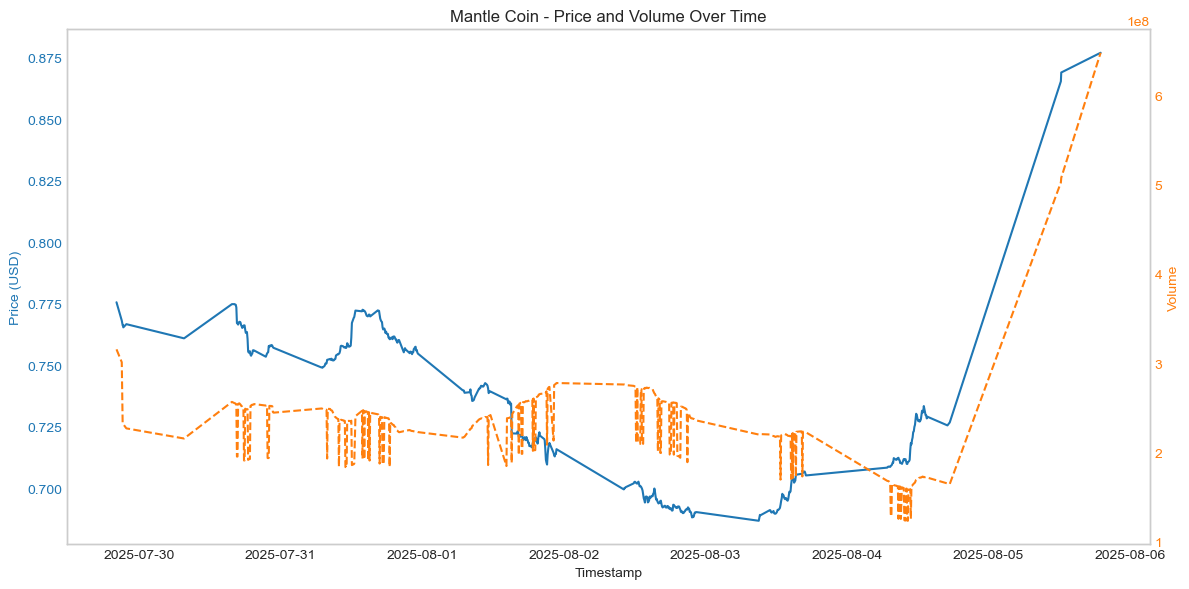

In [33]:
# Filter data untuk coin 'Mantle'
mantle_df = dataFrame[dataFrame['name'].str.lower() == 'mantle'].copy()

# Pastikan kolom timestamp dalam format datetime
mantle_df['timestamp'] = pd.to_datetime(mantle_df['timestamp'], format='ISO8601', errors='coerce')

# Drop baris dengan timestamp tidak valid
mantle_df = mantle_df.dropna(subset=['timestamp'])

# Urutkan berdasarkan waktu
mantle_df = mantle_df.sort_values('timestamp')

# Plot garis harga dan volume (tanpa grid, tanpa smoothing)
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot harga
color = 'tab:blue'
ax1.set_xlabel('Timestamp')
ax1.set_ylabel('Price (USD)', color=color)
ax1.plot(mantle_df['timestamp'], mantle_df['price'], color=color, label='Price')
ax1.tick_params(axis='y', labelcolor=color)

# Plot volume di axis kedua
ax2 = ax1.twinx()
color = 'tab:orange'
ax2.set_ylabel('Volume', color=color)
ax2.plot(mantle_df['timestamp'], mantle_df['volume_24h'], color=color, linestyle='--', label='Volume')
ax2.tick_params(axis='y', labelcolor=color)

# Bersihkan grid
ax1.grid(False)
ax2.grid(False)

plt.title('Mantle Coin - Price and Volume Over Time')
fig.tight_layout()
plt.show()